In [4]:
import pandas as pd

# Leer la tabla HTML de la página de Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)

# Seleccionar la tabla del índice S&P 500
sp500_table = tables[0]

# Renombrar la columna "Symbol" a "Ticker"
sp500_table = sp500_table.rename(columns={'Symbol': 'Ticker'})

# Exportar los datos a un archivo CSV
sp500_table.to_csv('sp500.csv', index=False)

In [5]:
print(sp500_table.columns)

Index(['Ticker', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')


In [6]:
import yfinance as yf
import pandas as pd

def download_data(tickers, start_date, end_date):
    """
    Descarga los datos históricos de una lista de tickers para un rango de fechas dado.
    Devuelve un dataframe con los datos y una columna "Ticker" para identificar la empresa.
    """
    data_frames = []
    for ticker in tickers:
        try:
            # Descargar los datos de Yahoo Finance
            df = yf.download(ticker, start=start_date, end=end_date)

            # Agregar una columna "Ticker"
            df['Ticker'] = ticker

            # Agregar el dataframe a la lista
            data_frames.append(df)
        except:
            print(f'No se pudo descargar el ticker {ticker}')

    # Concatenar todos los dataframes en uno solo
    data = pd.concat(data_frames)

    return data

In [7]:
print(data.columns)

Index(['Date', 'Ticker', 'GWW', 'TFC', 'TRMB', 'TRV', 'TSN', 'TYL', 'UAL',
       'UDR', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VFC',
       'VICI', 'VLO', 'VMC', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ',
       'WAB', 'WAT', 'WBA', 'WBD', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WM',
       'WMB', 'WMT', 'WRK', 'WST', 'WTW', 'WY', 'WYNN', 'XEL', 'XYL', 'YUM',
       'ZBH', 'ZBRA', 'ZION', 'ZTS'],
      dtype='object')


In [8]:
# Leer la tabla del índice S&P 500
sp500_table = pd.read_csv('sp500.csv')

# Dividir la lista de tickers en grupos de 50
tickers_groups = [sp500_table['Ticker'][i:i+50].tolist() for i in range(0, len(sp500_table), 50)]

# Descargar los datos para cada grupo de tickers
data_frames = []
for group in tickers_groups:
    df = download_data(group, start_date='1990-01-01', end_date='2023-03-28')
    data_frames.append(df)

# Concatenar los dataframes en uno solo
data = pd.concat(data_frames)

# Exportar los datos a un archivo CSV
data.to_csv('sp500_data.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker'], dtype='object')


In [10]:
# Leer el dataframe del Paso 1
sp500_table = pd.read_csv('sp500.csv')

# Cambiar el nombre de la columna "Symbol" a "Ticker"
sp500_table.rename(columns={'Symbol': 'Ticker'}, inplace=True)

# Leer el dataframe del Paso 2
sp500_data = pd.read_csv('sp500_data.csv')

# Unir los dataframes en base a la columna "Ticker"
merged = pd.merge(sp500_data, sp500_table, on='Ticker')

# Guardar el dataframe unido en un archivo CSV
merged.to_csv('sp500_merged.csv', index=False)

In [11]:
print(merged.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker',
       'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location',
       'Date added', 'CIK', 'Founded'],
      dtype='object')


In [12]:
import plotly.express as px

# Agrupar los datos por sector y subsector y sumar el valor de cierre de cada subsector
top_sectors = merged.groupby(['GICS Sector', 'GICS Sub-Industry']).agg({'Close': 'sum'}).reset_index()

# Crear un gráfico de sectores con px.sunburst
fig = px.sunburst(top_sectors, path=['GICS Sector', 'GICS Sub-Industry'], values='Close')
fig.show()

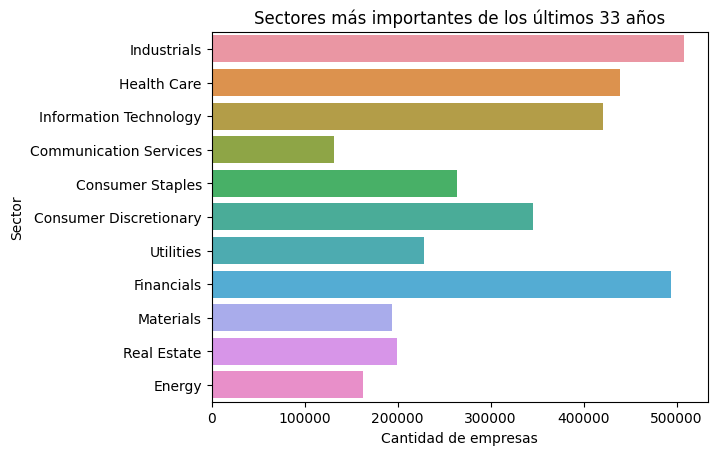

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras con seaborn
sns.countplot(y='GICS Sector', data=merged)
plt.title('Sectores más importantes de los últimos 33 años')
plt.xlabel('Cantidad de empresas')
plt.ylabel('Sector')
plt.show()

In [14]:
# Ordenar el dataframe agrupado por el valor de cierre
top_sectors = top_sectors.sort_values('Close', ascending=False)

# Seleccionar los 5 sectores con mayor valor
top_5_sectors = top_sectors['GICS Sector'].head(5).tolist()

print('Los 5 sectores con mayor crecimiento en los últimos 33 años son:')
for sector in top_5_sectors:
    print(sector)

Los 5 sectores con mayor crecimiento en los últimos 33 años son:
Consumer Discretionary
Health Care
Financials
Industrials
Industrials


In [15]:
# Ordenar el dataframe agrupado por el valor de cierre
top_sectors = top_sectors.sort_values('Close', ascending=False)

# Seleccionar los 5 sectores con mayor valor
top_5_sectors = top_sectors['GICS Sector'].head(5).tolist()

print('Los 5 sectores con mayor crecimiento en los últimos 33 años son:')
for sector in top_5_sectors:
    print(sector)

Los 5 sectores con mayor crecimiento en los últimos 33 años son:
Consumer Discretionary
Health Care
Financials
Industrials
Industrials


In [16]:
# Seleccionar los 5 sectores con mayor valor y obtener también el valor de cierre
top_5_sectors = top_sectors[['GICS Sector', 'Close']].sort_values('Close', ascending=False).head(5)

print('Los 5 sectores con mayor crecimiento en los últimos 33 años son:')
print(top_5_sectors)

Los 5 sectores con mayor crecimiento en los últimos 33 años son:
               GICS Sector         Close
20  Consumer Discretionary  9.404026e+06
59             Health Care  7.323393e+06
53              Financials  6.820524e+06
67             Industrials  6.038888e+06
80             Industrials  5.958284e+06


# Analisis Bursatil

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def get_stock_data(ticker, start_date, end_date):
    """
    Descarga los datos de precios de una empresa determinada en un rango de fechas determinado.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [19]:
# Seleccionar las 3 empresas más importantes del sector de tecnología
tech_top_3 = merged[merged['GICS Sector'] == 'Information Technology'].groupby('Ticker').agg({'Close': 'sum'}).sort_values('Close', ascending=False).head(3)

# Descargar los datos de precios de cada una de las 3 empresas en el rango de fechas determinado
start_date = '1990-01-01'
end_date = '2023-03-28'

tech_data = {}
for ticker in tech_top_3.index:
    stock_data = get_stock_data(ticker, start_date, end_date)
    tech_data[ticker] = stock_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


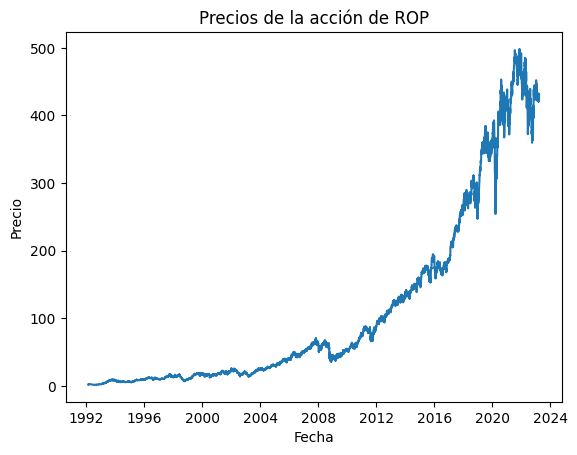

In [20]:
# Obtener la empresa con mayor valor de cierre en el sector de tecnología
tech_top_1 = tech_top_3.index[0]

# Crear la gráfica de precios
plt.plot(tech_data[tech_top_1]['Close'])
plt.title(f'Precios de la acción de {tech_top_1}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()

### ELEJIMOS 3 empresas del sector de "Consumer Discretionary"

In [22]:
import pandas as pd

# filtrar empresas del sector de consumo discrecional
consumer_df = merged[merged['GICS Sector'] == 'Consumer Discretionary']

# seleccionar tres empresas aleatorias
consumer_tickers = consumer_df['Ticker'].sample(n=3).tolist()

In [23]:
import yfinance as yf

# descargar precios de las acciones de las empresas seleccionadas
prices_dict = {}
for ticker in consumer_tickers:
    prices_dict[ticker] = yf.download(ticker, start='1990-01-01', end='2022-03-28')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
import numpy as np

# calcular rendimiento y volatilidad de las acciones
returns_dict = {}
volatility_dict = {}
for ticker, prices in prices_dict.items():
    returns = np.log(prices/prices.shift(1))
    returns_dict[ticker] = returns
    volatility_dict[ticker] = returns.std()*np.sqrt(252)

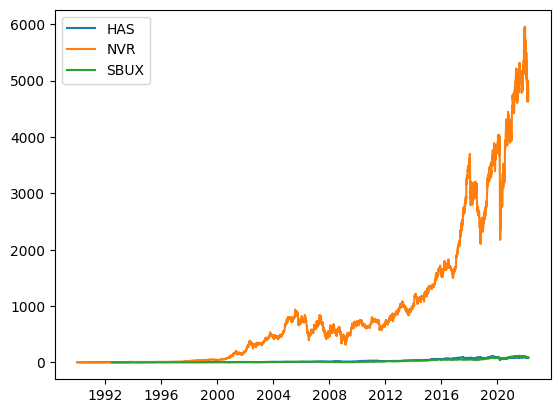

Rendimientos anualizados:
{'HAS': 0.10117815115991326, 'NVR': 0.21256483587087394, 'SBUX': 0.1938330850488177}
Volatilidades anualizadas:
{'HAS': 0.3282218254779962, 'NVR': 0.8533888616683838, 'SBUX': 0.38011693996141505}


In [25]:
import matplotlib.pyplot as plt

# graficar precios de las acciones
for ticker, prices in prices_dict.items():
    plt.plot(prices.index, prices.values, label=ticker)
plt.legend()
plt.show()

# calcular rendimiento anualizado y volatilidad anualizada
annual_returns_dict = {}
annual_volatility_dict = {}
for ticker, returns in returns_dict.items():
    annual_returns_dict[ticker] = returns.mean()*252
    annual_volatility_dict[ticker] = returns.std()*np.sqrt(252)

print('Rendimientos anualizados:')
print(annual_returns_dict)

print('Volatilidades anualizadas:')
print(annual_volatility_dict)

### ELEJIMOS 3 empresas del sector de "Health Care"

In [26]:
import pandas as pd

# filtrar empresas del sector de consumo discrecional
consumer_df = merged[merged['GICS Sector'] == 'Health Care']

# seleccionar tres empresas aleatorias
consumer_tickers = consumer_df['Ticker'].sample(n=3).tolist()

In [27]:
import yfinance as yf

# descargar precios de las acciones de las empresas seleccionadas
prices_dict = {}
for ticker in consumer_tickers:
    prices_dict[ticker] = yf.download(ticker, start='1990-01-01', end='2022-03-28')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
import numpy as np

# calcular rendimiento y volatilidad de las acciones
returns_dict = {}
volatility_dict = {}
for ticker, prices in prices_dict.items():
    returns = np.log(prices/prices.shift(1))
    returns_dict[ticker] = returns
    volatility_dict[ticker] = returns.std()*np.sqrt(252)

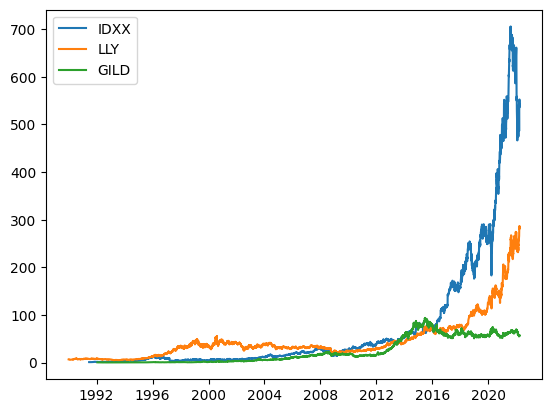

Rendimientos anualizados:
{'IDXX': 0.20636828919203884, 'LLY': 0.116535800833531, 'GILD': 0.15782119549169088}
Volatilidades anualizadas:
{'IDXX': 0.42263671483580145, 'LLY': 0.2793599181105964, 'GILD': 0.48431385887496586}


In [29]:
import matplotlib.pyplot as plt

# graficar precios de las acciones
for ticker, prices in prices_dict.items():
    plt.plot(prices.index, prices.values, label=ticker)
plt.legend()
plt.show()

# calcular rendimiento anualizado y volatilidad anualizada
annual_returns_dict = {}
annual_volatility_dict = {}
for ticker, returns in returns_dict.items():
    annual_returns_dict[ticker] = returns.mean()*252
    annual_volatility_dict[ticker] = returns.std()*np.sqrt(252)

print('Rendimientos anualizados:')
print(annual_returns_dict)

print('Volatilidades anualizadas:')
print(annual_volatility_dict)

### ELEJIMOS 3 empresas del sector de "Information Technology"

In [30]:
import pandas as pd

# filtrar empresas del sector de consumo discrecional
consumer_df = merged[merged['GICS Sector'] == 'Information Technology']

# seleccionar tres empresas aleatorias
consumer_tickers = consumer_df['Ticker'].sample(n=3).tolist()

In [31]:
import yfinance as yf

# descargar precios de las acciones de las empresas seleccionadas
prices_dict = {}
for ticker in consumer_tickers:
    prices_dict[ticker] = yf.download(ticker, start='1990-01-01', end='2022-03-28')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
import numpy as np

# calcular rendimiento y volatilidad de las acciones
returns_dict = {}
volatility_dict = {}
for ticker, prices in prices_dict.items():
    returns = np.log(prices/prices.shift(1))
    returns_dict[ticker] = returns
    volatility_dict[ticker] = returns.std()*np.sqrt(252)

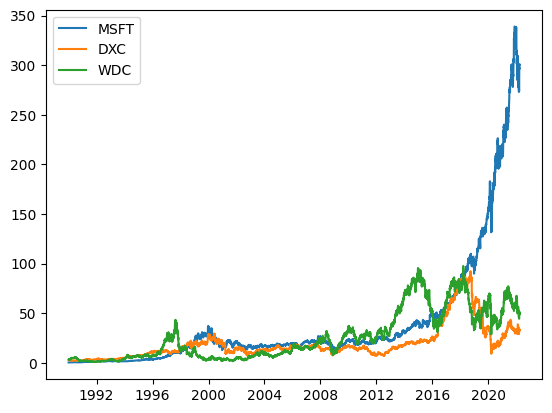

Rendimientos anualizados:
{'IDXX': 0.20636828919203884, 'LLY': 0.116535800833531, 'GILD': 0.15782119549169088}
Volatilidades anualizadas:
{'IDXX': 0.42263671483580145, 'LLY': 0.2793599181105964, 'GILD': 0.48431385887496586}


In [32]:
import matplotlib.pyplot as plt

# graficar precios de las acciones
for ticker, prices in prices_dict.items():
    plt.plot(prices.index, prices.values, label=ticker)
plt.legend()
plt.show()

# calcular rendimiento anualizado y volatilidad anualizada
annual_returns_dict = {}
annual_volatility_dict = {}
for ticker, returns in returns_dict.items():
    annual_returns_dict[ticker] = returns.mean()*252
    annual_volatility_dict[ticker] = returns.std()*np.sqrt(252)

print('Rendimientos anualizados:')
print(annual_returns_dict)

print('Volatilidades anualizadas:')
print(annual_volatility_dict)